# Análisis exploratorio de datos de un Dataset sobre precios de vehículos en Argentina

__[Link al Dataset](https://www.kaggle.com/datasets/ahmettalhabektas/argentina-car-prices)__

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Cargando el Dataset

In [3]:
df = pd.read_csv('argentina_cars.csv')
df.head()

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos


## Autos en pesos argentinos

In [4]:
auto_pesos = df[df['currency']=='pesos']
auto_pesos

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos
9,6800000,Volkswagen,T-Cross,2019,Naranja,Nafta,5.0,Automática,1.6 MSI Nafta,SUV,35000,pesos
12,3500000,Renault,Sandero,2022,Plateado,Nafta,5.0,Manual,NaN,Sedán,111111,pesos
...,...,...,...,...,...,...,...,...,...,...,...,...
503,7700000,Honda,CR-V,2017,Gris,Nafta,5.0,Automática,2.4,SUV,154451,pesos
504,2890000,Chevrolet,Cruze,2014,Gris,Nafta,5.0,Manual,1.8,Hatchback,107000,pesos
505,5250000,Chevrolet,Tracker,2018,Gris,Nafta,5.0,Automática,1.8,SUV,52000,pesos
507,3960000,Peugeot,2008,2017,Blanco,Nafta,5.0,Manual,1.6,SUV,75358,pesos


### ¿Cuánto sale el auto más caro en pesos?

In [5]:
print('El auto más caro en pesos vale $',auto_pesos['money'].max())

El auto más caro en pesos vale $ 14299000


### ¿Cuál es el auto más caro en pesos?

In [6]:
auto_mas_caro = auto_pesos[auto_pesos['money'] == auto_pesos['money'].max()]
auto_mas_caro[['brand', 'model']]

,brand,model
368,Volkswagen,Amarok


### ¿Cuánto sale el auto más barato en pesos?

In [7]:
print('El auto más barato en pesos vale $',auto_pesos['money'].min())

El auto más barato en pesos vale $ 1200000


### ¿Cuál es el auto más barato en pesos?

In [8]:
auto_mas_barato = auto_pesos[auto_pesos['money'] == auto_pesos['money'].min()]
auto_mas_barato[['brand', 'model']]

,brand,model
421,Chevrolet,Corsa


### Diferencia económica entre el auto más caro y el más barato

In [9]:
print('La diferencia económica que existe entre el auto más caro y el más barato es de: $', auto_pesos['money'].max()-auto_pesos['money'].min())

La diferencia económica que existe entre el auto más caro y el más barato es de: $ 13099000


### Los 5 autos más caros en pesos

In [10]:
top_cinco_autos_caros = auto_pesos[['money', 'brand', 'model']].sort_values(by='money', ascending=False)[:5]
top_cinco_autos_caros

,money,brand,model
368,14299000,Volkswagen,Amarok
275,13949900,Chevrolet,Trailblazer
269,12490000,Toyota,Corolla Cross
279,12489000,Toyota,Hilux
121,12400000,Toyota,Hilux


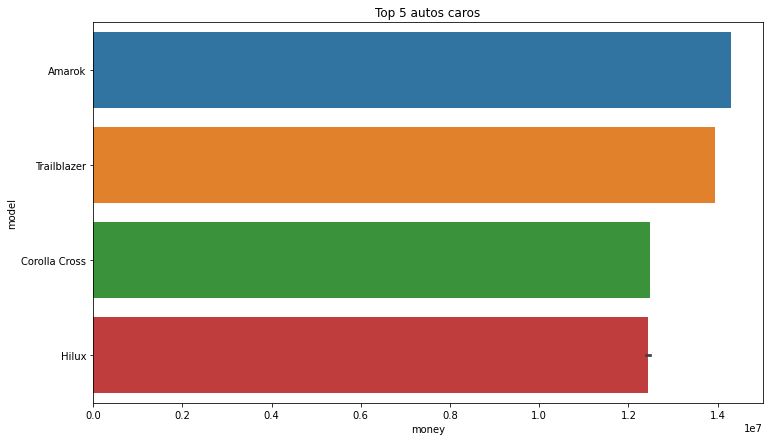

In [11]:
plt.figure(figsize=(12,7))
sns.barplot(x='money', y='model', data=top_cinco_autos_caros)
plt.title("Top 5 autos caros")
plt.show()

### Los 5 autos más baratos en pesos

In [12]:
top_cinco_autos_baratos = auto_pesos[['money', 'brand', 'model']].sort_values(by='money', ascending=True)[:5]
top_cinco_autos_baratos

,money,brand,model
421,1200000,Chevrolet,Corsa
108,1550000,Volkswagen,Gol
109,1595000,Renault,Clio
100,1610000,Renault,Sandero
104,1650000,Volkswagen,Up!


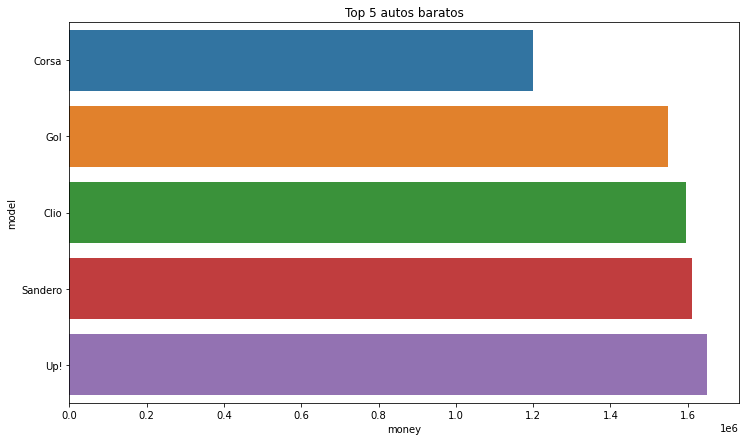

In [13]:
plt.figure(figsize=(12,7))
sns.barplot(x='money', y='model', data=top_cinco_autos_baratos)
plt.title("Top 5 autos baratos")
plt.show()

### Promedio de precio de autos en pesos

In [14]:
print('El promedio de precio de un auto en pesos es de $', round(auto_pesos['money'].mean()))

El promedio de precio de un auto en pesos es de $ 4732678


## Autos en dólares 

In [15]:
auto_dolares = df[df['currency']=='dólares']
auto_dolares

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,dólares
5,34500,Jeep,Compass,2022,Negro,Nafta,5.0,Automática,1.3,SUV,10500,dólares
6,25000,Kia,Sorento,2014,Negro,Diésel,5.0,Automática,2.2,SUV,156000,dólares
7,12300,Mercedes-Benz,Clase C,2008,Plateado,Nafta,4.0,Automática,1.8,Sedán,174000,dólares
...,...,...,...,...,...,...,...,...,...,...,...,...
483,46990,Volkswagen,Golf,2018,Blanco,Nafta,5.0,Automática,2.0,Hatchback,15300,dólares
486,90000,Jeep,Grand Cherokee,2017,Gris,Nafta,5.0,Automática,6.4,SUV,35000,dólares
489,15900,Volkswagen,Passat,2012,Gris,Nafta,4.0,Automática,2.0,Sedán,147000,dólares
506,46000,Volkswagen,Amarok,2019,Gris,Diésel,4.0,Automática,3.0,Pick-Up,49000,dólares


### Pasando el data set de dólares a pesos

In [16]:
def conversor(dolares):
    conversion = dolares*315 #Tomamos como tipo de cambio el dólar blue, dónde 1 USD blue = $315 aproximadamente
    return conversion

auto_dolares['money'] = auto_dolares['money'].apply(conversor)
auto_dolares.head()

C:\Users\usuario\AppData\Local\Temp\ipykernel_5280\70428216.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_dolares['money'] = auto_dolares['money'].apply(conversor)


,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
2,11182500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,5985000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,dólares
5,10867500,Jeep,Compass,2022,Negro,Nafta,5.0,Automática,1.3,SUV,10500,dólares
6,7875000,Kia,Sorento,2014,Negro,Diésel,5.0,Automática,2.2,SUV,156000,dólares
7,3874500,Mercedes-Benz,Clase C,2008,Plateado,Nafta,4.0,Automática,1.8,Sedán,174000,dólares


### Cambiando la moneda de dólares a pesos

In [17]:
def pesos(fila):
    fila = 'pesos'
    return fila

auto_dolares['currency'] = auto_dolares['currency'].apply(pesos) 
auto_dolares.head()

C:\Users\usuario\AppData\Local\Temp\ipykernel_5280\1143938621.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_dolares['currency'] = auto_dolares['currency'].apply(pesos)


,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
2,11182500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,pesos
3,5985000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,pesos
5,10867500,Jeep,Compass,2022,Negro,Nafta,5.0,Automática,1.3,SUV,10500,pesos
6,7875000,Kia,Sorento,2014,Negro,Diésel,5.0,Automática,2.2,SUV,156000,pesos
7,3874500,Mercedes-Benz,Clase C,2008,Plateado,Nafta,4.0,Automática,1.8,Sedán,174000,pesos


### ¿Cuánto sale el auto más caro en nuestro nuevo Dataset?

In [18]:
print('El auto más caro en la conversión de dólares a pesos sale $',auto_dolares['money'].max())

El auto más caro en la conversión de dólares a pesos sale $ 135450000


### ¿Cuál es el auto más caro en nuestro nuevo Dataset?

In [19]:
auto_mas_caro_usd = auto_dolares[auto_dolares['money'] == auto_dolares['money'].max()]
auto_mas_caro_usd[['brand', 'model']]

,brand,model
461,Audi,R8 Coupé


### ¿Cuánto sale el auto más barato en nuestro nuevo Dataset?

In [20]:
print('El auto más barato en la conversión de dólares a pesos sale $',auto_dolares['money'].min())

El auto más barato en la conversión de dólares a pesos sale $ 2520000


### ¿Cuál es el auto más barato en nuestro nuevo Dataset?

In [21]:
auto_mas_barato_usd = auto_dolares[auto_dolares['money'] == auto_dolares['money'].min()]
auto_mas_barato_usd[['brand', 'model']]

,brand,model
288,Volkswagen,Gol Trend


### Top 5 autos más caros en nuestro nuevo Dataset

In [22]:
top_cinco_autos_caros_usd = auto_dolares[['money', 'brand', 'model']].sort_values(by='money', ascending=False)[:5]
top_cinco_autos_caros_usd

,money,brand,model
461,135450000,Audi,R8 Coupé
403,74025000,Audi,R8 Coupé
54,58275000,Mercedes-Benz,Clase E
400,40320000,Ford,F-150
134,36445500,BMW,Serie M


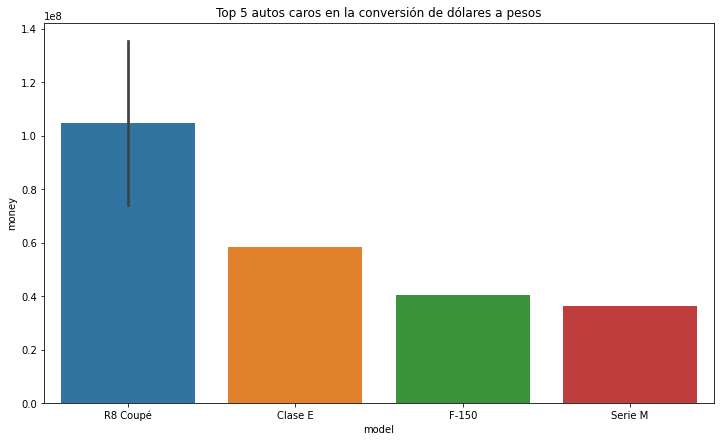

In [23]:
plt.figure(figsize=(12,7))
sns.barplot(y='money', x='model', data=top_cinco_autos_caros_usd)
plt.title("Top 5 autos caros en la conversión de dólares a pesos")
plt.show()

### Top 5 autos más baratos en nuestro nuevo Dataset

In [24]:
top_cinco_autos_baratos_usd = auto_dolares[['money', 'brand', 'model']].sort_values(by='money', ascending=True)[:5]
top_cinco_autos_baratos_usd

,money,brand,model
288,2520000,Volkswagen,Gol Trend
437,2803500,Volvo,C30
440,3150000,Volvo,960
250,3338685,Mercedes-Benz,Clase C
7,3874500,Mercedes-Benz,Clase C


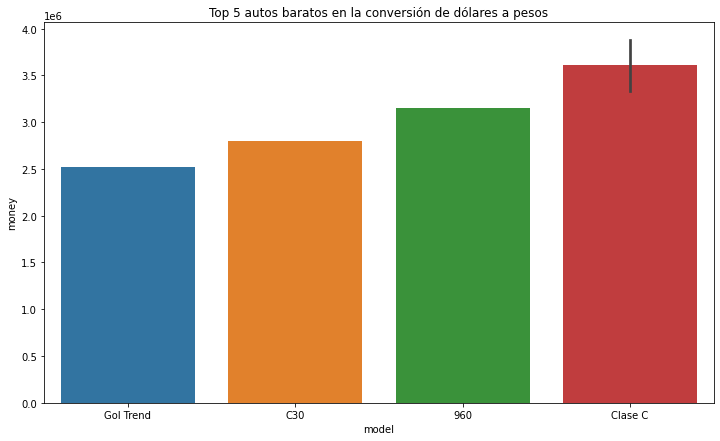

In [25]:
plt.figure(figsize=(12,7))
sns.barplot(y='money', x='model', data=top_cinco_autos_baratos_usd)
plt.title("Top 5 autos baratos en la conversión de dólares a pesos")
plt.show()

### Promedio de precio de autos convertido de dólares a pesos

In [26]:
print('El promedio de precio de un auto en pesos es de $', round(auto_dolares['money'].mean()))

El promedio de precio de un auto en pesos es de $ 14962022


## Unimos el Dataset de autos en pesos y el de autos convertido de dólares a pesos

In [27]:
nuevoDf= pd.concat([auto_pesos, auto_dolares], axis=0)
nuevoDf

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos
9,6800000,Volkswagen,T-Cross,2019,Naranja,Nafta,5.0,Automática,1.6 MSI Nafta,SUV,35000,pesos
12,3500000,Renault,Sandero,2022,Plateado,Nafta,5.0,Manual,NaN,Sedán,111111,pesos
...,...,...,...,...,...,...,...,...,...,...,...,...
483,14801850,Volkswagen,Golf,2018,Blanco,Nafta,5.0,Automática,2.0,Hatchback,15300,pesos
486,28350000,Jeep,Grand Cherokee,2017,Gris,Nafta,5.0,Automática,6.4,SUV,35000,pesos
489,5008500,Volkswagen,Passat,2012,Gris,Nafta,4.0,Automática,2.0,Sedán,147000,pesos
506,14490000,Volkswagen,Amarok,2019,Gris,Diésel,4.0,Automática,3.0,Pick-Up,49000,pesos


### Agrupamos el Dataset por colores para poder conocer la cantidad de autos que representa cada color

In [28]:
agrupadoColor = nuevoDf.groupby('color').count()
agrupadoColor.drop(['brand', 'model', 'year', 'fuel_type', 'door', 'gear', 'motor', 'body_type', 'kilometres', 'currency'], axis=1, inplace=True) #Quitamos las columnas que no nos sirvan
agrupadoColor = agrupadoColor.rename(columns={'money': 'cantidad'}) #Modificamos el nombre de una columna por el de cantidad
agrupadoColor

,cantidad
color,
Azul,25
Beige,1
Blanco,150
Celeste,4
Dorado,8
Gris,158
Gris oscuro,3
Marrón,4
Naranja,3


### Ordenamos el Dataset de acuerdo a la cantidad, mostrando los cinco colores más elegidos

In [29]:
top_cinco_colores = agrupadoColor.sort_values(by='cantidad', ascending=False)[:5]
top_cinco_colores

,cantidad
color,
Gris,158
Blanco,150
Negro,60
Plateado,53
Azul,25


### Determinamos cuántos vehículos tienen caja automática y cuántos tienen caja manual

In [37]:
caja = nuevoDf.groupby('gear').count()
caja.drop(['brand', 'model', 'year', 'fuel_type', 'door', 'color', 'motor', 'body_type', 'kilometres', 'currency'], axis=1, inplace=True) #Quitamos las columnas que no nos sirvan
caja = caja.rename(columns={'money': 'cantidad'}) #Modificamos el nombre de una columna por el de cantidad
caja

,cantidad
gear,
Automática,211
Manual,298


### Filtrado del Dataset a partir de la marca

#### Vemos las marcas presentes en nuestro Dataset

In [47]:
brand = nuevoDf.groupby('brand').count()
brand.head(27) #Vemos cuáles son las marcas presentes en nuestro Dataset

,money,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
brand,,,,,,,,,,,
Audi,8,8,8,8,8,8,8,8,8,8,8
BMW,13,13,13,12,13,13,13,12,13,13,13
Baic,1,1,1,1,1,1,1,1,1,1,1
Chery,1,1,1,1,1,1,1,1,1,1,1
Chevrolet,51,51,51,50,51,51,51,50,51,51,51
Citroën,32,32,32,30,32,32,32,31,32,32,32
DS,2,2,2,2,2,2,2,2,2,2,2
Dodge,4,4,4,4,4,4,4,4,4,4,4
Fiat,25,25,25,25,25,25,25,23,24,25,25


#### Establecemos las 5 marcas con mayor presencia en nuestro Dataset

In [81]:
brand.sort_values(by='money', ascending=False)[:5]

,money,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
brand,,,,,,,,,,,
Volkswagen,88,88,88,86,88,88,88,88,88,88,88
Ford,57,57,57,56,57,57,57,56,57,57,57
Chevrolet,51,51,51,50,51,51,51,50,51,51,51
Peugeot,49,49,49,47,49,49,49,49,49,49,49
Toyota,47,47,47,46,47,47,46,45,47,47,47


### Analizando las 5 marcas con mayor presencia

#### Volkswagen

In [98]:
volkswagen = nuevoDf[nuevoDf['brand']=='Volkswagen']
volkswagen.head()

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
9,6800000,Volkswagen,T-Cross,2019,Naranja,Nafta,5.0,Automática,1.6 MSI Nafta,SUV,35000,pesos
13,5990000,Volkswagen,Polo,2022,Blanco,Nafta,5.0,Manual,1.6,Hatchback,111111,pesos
57,2500000,Volkswagen,Up!,2015,Blanco,Nafta,5.0,Automática,1.0,Hatchback,110000,pesos
75,8490000,Volkswagen,Vento,2018,Blanco,Nafta,4.0,Manual,2.0,Sedán,44000,pesos
97,7550000,Volkswagen,Nivus,2021,Blanco,Nafta,5.0,Automática,1.0,SUV,34000,pesos


#### El auto más caro de Volkswagen

In [90]:
volkswagen_mas_caro = volkswagen[volkswagen['money'] == volkswagen['money'].max()]
volkswagen_mas_caro[['money', 'model', 'gear', 'body_type']]

,money,model,gear,body_type
483,14801850,Golf,Automática,Hatchback


#### El auto más barato de Volkswagen

In [91]:
volkswagen_mas_barato = volkswagen[volkswagen['money'] == volkswagen['money'].min()]
volkswagen_mas_barato[['money', 'model', 'gear', 'body_type']]

,money,model,gear,body_type
108,1550000,Gol,Manual,Hatchback


#### Ford

In [97]:
ford = nuevoDf[nuevoDf['brand']=='Ford']
ford.head()

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
15,2100000,Ford,Ecosport,2011,Beige,Nafta,4.0,Manual,1.6,SUV,101000,pesos
25,4500000,Ford,Ecosport,2019,Gris,Nafta,5.0,Manual,1.5,SUV,61000,pesos
28,7500000,Ford,Ranger,2021,Blanco,Diésel,4.0,Manual,2.2,Pick-Up,55000,pesos
34,3150000,Ford,Fiesta,2016,Rojo,Nafta,5.0,Manual,NaN,Hatchback,68000,pesos
46,3750000,Ford,Kuga,2013,Blanco,Nafta,5.0,Manual,2.5,SUV,85000,pesos


#### El auto más caro de Ford

In [93]:
ford_mas_caro = ford[ford['money'] == ford['money'].max()]
ford_mas_caro[['money', 'model', 'gear', 'body_type']]

,money,model,gear,body_type
400,40320000,F-150,Automática,Pick-Up


#### El auto más barato de Ford

In [94]:
ford_mas_barato = ford[ford['money'] == ford['money'].min()]
ford_mas_barato[['money', 'model', 'gear', 'body_type']]

,money,model,gear,body_type
443,1698000,Ka,Manual,Hatchback


#### Chevrolet

In [96]:
chevrolet = nuevoDf[nuevoDf['brand']=='Chevrolet']
chevrolet.head()

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
26,2400000,Chevrolet,Classic,2014,Gris,Nafta,5.0,Manual,1.6,Hatchback,38000,pesos
38,3050000,Chevrolet,Onix,2016,Gris,Nafta,5.0,Manual,1.4,Hatchback,64000,pesos
40,9389900,Chevrolet,Equinox,2021,Plateado,Nafta,5.0,Automática,1.5,SUV,23000,pesos
81,2950000,Chevrolet,Spin,2014,Gris,Nafta,5.0,Automática,1.8,Monovolumen,140000,pesos
83,3450000,Chevrolet,Spin,2016,Blanco,Nafta,5.0,Manual,1.8,Monovolumen,48000,pesos


#### El auto más caro de Chevrolet

In [99]:
chevrolet_mas_caro = chevrolet[chevrolet['money'] == chevrolet['money'].max()]
chevrolet_mas_caro[['money', 'model', 'gear', 'body_type']]

,money,model,gear,body_type
275,13949900,Trailblazer,Automática,SUV


#### El auto más barato de Chevrolet

In [100]:
chevrolet_mas_barato = chevrolet[chevrolet['money'] == chevrolet['money'].min()]
chevrolet_mas_barato[['money', 'model', 'gear', 'body_type']]

,money,model,gear,body_type
421,1200000,Corsa,Manual,Hatchback


#### Peugeot

In [102]:
peugeot = nuevoDf[nuevoDf['brand']=='Peugeot']
peugeot.head()

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
29,2450000,Peugeot,408,2013,Gris oscuro,Nafta,4.0,Manual,2,Sedán,95000,pesos
39,3150000,Peugeot,408,2015,Blanco,Nafta,4.0,Manual,1.6,Sedán,90000,pesos
41,3290000,Peugeot,308,2015,Blanco,Nafta,5.0,Automática,1.6,Hatchback,83000,pesos
44,3100000,Peugeot,408,2015,Gris,Nafta,4.0,Manual,2.0,Sedán,57000,pesos
45,2750000,Peugeot,308,2014,Blanco,Nafta,5.0,Manual,1.6,Hatchback,98000,pesos


#### El auto más caro de Peugeot

In [103]:
peugeot_mas_caro = peugeot[peugeot['money'] == peugeot['money'].max()]
peugeot_mas_caro[['money', 'model', 'gear', 'body_type']]

,money,model,gear,body_type
297,10500000,3008,Automática,SUV


#### El auto más barato de Peugeot

In [104]:
peugeot_mas_barato = peugeot[peugeot['money'] == peugeot['money'].min()]
peugeot_mas_barato[['money', 'model', 'gear', 'body_type']]

,money,model,gear,body_type
467,1950000,504,Manual,Sedán


#### Toyota

In [105]:
toyota = nuevoDf[nuevoDf['brand']=='Toyota']
toyota.head()

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos
17,2940000,Toyota,Etios,2015,Blanco,Nafta,5.0,Manual,1.5,Hatchback,83000,pesos
19,4120000,Toyota,RAV4,2011,Gris,Nafta,5.0,Automática,2.4,SUV,180000,pesos
20,4100000,Toyota,Etios,2018,Gris,Nafta,5.0,Manual,1.5,Sedán,80000,pesos


#### El auto más caro de Toyota

In [106]:
toyota_mas_caro = toyota[toyota['money'] == toyota['money'].max()]
toyota_mas_caro[['money', 'model', 'gear', 'body_type']]

,money,model,gear,body_type
211,18900000,Hilux,NaN,Pick-Up


#### El auto más barato de Toyota

In [108]:
toyota_mas_barato = toyota[toyota['money'] == toyota['money'].min()]
toyota_mas_barato[['money', 'model', 'gear', 'body_type']]

,money,model,gear,body_type
476,2790000,Corolla,Manual,Sedán
